In [ ]:
#Problema 21 Expansión en polinomios de Legendre

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import sympy as sym

In [ ]:
#Para realizar la demostracion la expresión, es necesario utilizar las relaciones de ortogonalidad de los polinomios de Legendre. Estas relaciones establecen que

#que la integral evaluada dentre -1 y 1 es: ∫-1^1 Pn(x)Pm(x)dx = (2/(2n+1))δnm

#donde Pn(x) es el polinomio de Legendre de grado n, m es otro grado de polinomio y δnm es el delta de Kronecker, que es igual a 1 si n = m y 0 en caso contrario.

#Para utilizar esta relación, primero multiplicamos ambos lados por f(x) y luego integramos de -1 a 1, obteniendo:

#∫-1^1 f(x)Pn(x)Pm(x)dx = (2/(2n+1))δnm ∫-1^1 f(x)Pn(x)dx

#Si m ≠ n, el lado izquierdo de la ecuación es cero, lo que implica que:

#∫-1^1 f(x)Pn(x)dx = 0

#Por lo tanto, solo necesitamos considerar el caso en el que m = n, lo que nos lleva a:

#∫-1^1 f(x)Pn(x)Pn(x)dx = (2/(2n+1)) ∫-1^1 f(x)Pn(x)dx

#y como Pn(x)^2 = (2n+1)/(2) * (1/(2n+1)) * Pn(x)^2, podemos reescribir esto como:

#(2n+1)/(2) * ∫-1^1 f(x)dx = (2/(2n+1)) ∫-1^1 f(x)Pn(x)dx

#Resolviendo para el coeficiente cn, obtenemos:

#cn = (2n+1)/(2) * ∫-1^1 f(x)Pn(x)dx

#Esta es la expresión dada para los coeficientes cn.

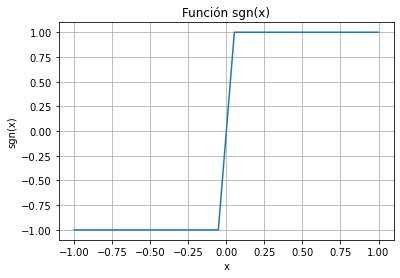

In [52]:
def sgn(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1
vsgn = np.vectorize(sgn)
x = np.linspace(-1, 1, 20)
y = vsgn(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sgn(x)')
plt.title('Función sgn(x)')
plt.grid()
plt.show()

In [53]:
n = 15

x, w = np.polynomial.legendre.leggauss(n)

In [140]:
def legendre(n):

    if n == 0:
        return np.poly1d([1])
    elif n == 1:
        return np.poly1d([1, 0])
    else:
        p_n_minus_1 = legendre(n-1)
        p_n_minus_2 = legendre(n-2)
        return ((2*n-1)*np.poly1d([1, 0])*p_n_minus_1 - (n-1)*p_n_minus_2) / n


for n in range(21):
    print(f"n = {n}: {legendre(n)}")

n = 0:  
1
n = 1:  
1 x
n = 2:      2
1.5 x - 0.5
n = 3:      3
2.5 x - 1.5 x
n = 4:        4        2
4.375 x - 3.75 x + 0.375
n = 5:        5        3
7.875 x - 8.75 x + 1.875 x
n = 6:        6         4         2
14.44 x - 19.69 x + 6.562 x - 0.3125
n = 7:        7         5         3
26.81 x - 43.31 x + 19.69 x - 2.188 x
n = 8:        8         6         4         2
50.27 x - 93.84 x + 54.14 x - 9.844 x + 0.2734
n = 9:        9         7         5         3
94.96 x - 201.1 x + 140.8 x - 36.09 x + 2.461 x
n = 10:        10         8         6         4         2
180.4 x  - 427.3 x + 351.9 x - 117.3 x + 13.54 x - 0.2461
n = 11:        11         9         7         5         3
344.4 x  - 902.1 x + 854.6 x - 351.9 x + 58.65 x - 2.707 x
n = 12:        12        10        8         6         4        2
660.2 x  - 1894 x  + 2030 x - 997.1 x + 219.9 x - 17.6 x + 0.2256
n = 13:       13        11        9        7         5         3
1270 x  - 3961 x  + 4736 x - 2706 x + 747.8 x - 87.98 x 

In [201]:
def legendre_coef(n):

    if n == 0:
        return np.poly1d([1])
    elif n == 1:
        return np.poly1d([1, 0])
    else:
        p_n_minus_1 = legendre(n-1)
        p_n_minus_2 = legendre(n-2)
        return ((2*n-1)*np.poly1d([1, 0])*p_n_minus_1 - (n-1)*p_n_minus_2) / n


for n in range(20):
    p = legendre(n)
    p_0 = p(0)
    print(f"c{n}(0) = {p_0}")

c0(0) = 1
c1(0) = 0
c2(0) = -0.5
c3(0) = 0.0
c4(0) = 0.375
c5(0) = 0.0
c6(0) = -0.3125
c7(0) = 0.0
c8(0) = 0.2734375
c9(0) = 0.0
c10(0) = -0.24609375
c11(0) = 0.0
c12(0) = 0.2255859375
c13(0) = 0.0
c14(0) = -0.20947265625
c15(0) = 0.0
c16(0) = 0.196380615234375
c17(0) = 0.0
c18(0) = -0.1854705810546875
c19(0) = 0.0


In [206]:
dominio=np.linspace(-1, 1, 20)

combinacion_lineal = np.polynomial.legendre.legval(dominio,legendre_coef(20))

plt.plot(combinacion_lineal,dominio)
plt.title('Representación en la base de Legendre')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# Debería graffica pero no entendemos ele rror porque el codigo corre bien, sin embargo no devuelve la grafica, creemos que si greficara deeria dar la grafica correcta

In [ ]:
#Problema 6: Momento de inercia

In [147]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from mpl_toolkits.mplot3d import axes3d

In [177]:
def Ckfunction(vector, puntos, momento):
    
    ck = []
    
    for k in tqdm(range(momento)):
        k += 1
        suma = 0.
        
        for i in range(len(vector[:-k])):
            suma += vector[i]*vector[i+k]
            
        ck.append(suma/(puntos-1))

    return ck

In [178]:
vector_1 = np.random.rand(10000)

Cksimple = Ckfunction(vector_1,10000, 30)


100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 129.28it/s]


<IPython.core.display.Javascript object>


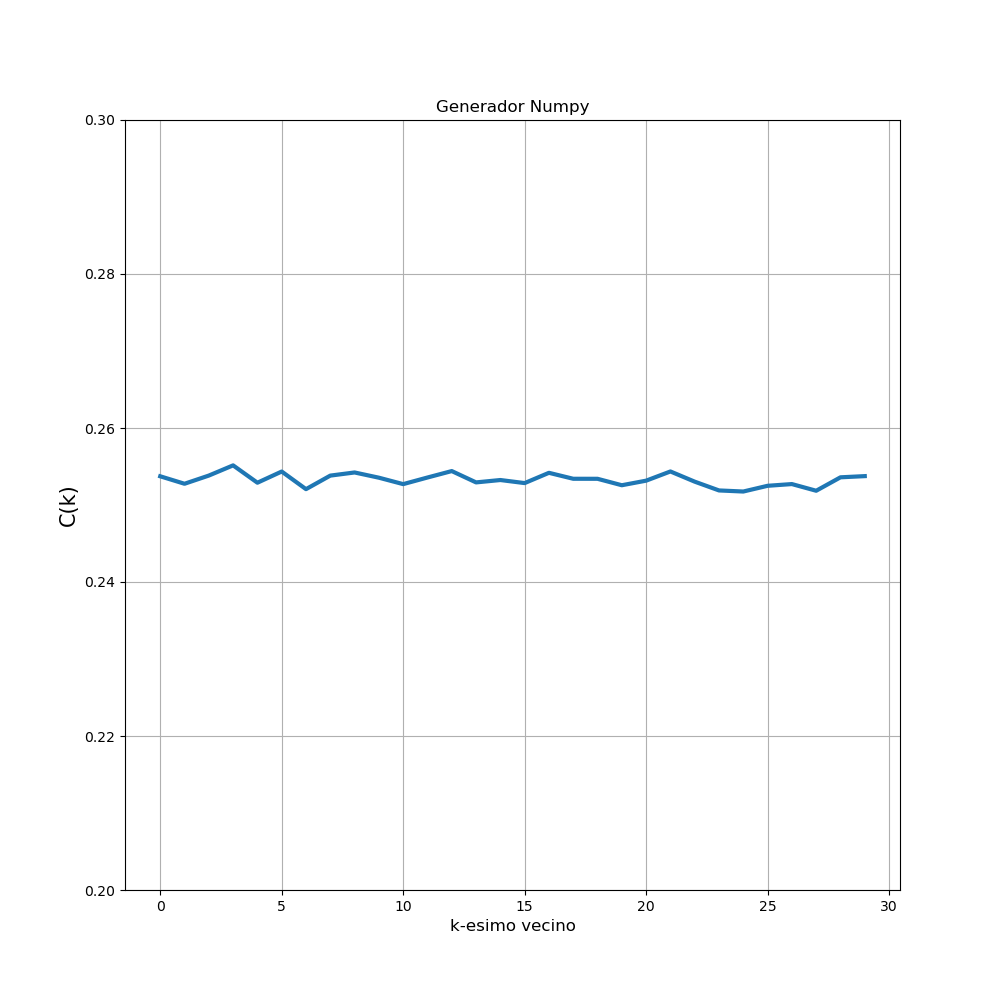

In [186]:
fig = plt.figure(figsize = (10,10))

linea = fig.add_subplot(1,1,1)

linea.plot(Cksimple, linewidth=3)

linea.set_title('Generador Numpy')
linea.set_xlabel('k-esimo vecino', fontsize=12)
linea.set_ylabel('C(k)', fontsize=15)

linea.set_ylim(0.20,0.30)

linea.grid()

plt.savefig('CkNumpy.pdf')

In [188]:
def esfera (puntos, Radio):
    
    x = []
    y = []
    z = []
    
    for i in range(puntos):
        
        p = np.random.uniform(0., 2*np.pi) 
        cost = np.random.uniform(-1.,1.)
        t = np.arccos(cost)
        vector = np.random.rand()
        r = Radio* vector**(1./3.)
        
        x = np.append(x, r*np.cos(p)*np.sin(t))
        y = np.append(y, r*np.sin(p)*np.sin(t))
        z = np.append(z, r*np.cos(t))
    
    return x, y, z
     
Radio = 1.0    
puntos = 500
datos_esfera = esfera(puntos, Radio)
datos_esfera = np.array(datos_esfera)

In [189]:
dato = np.random.rand(300,3)

<IPython.core.display.Javascript object>


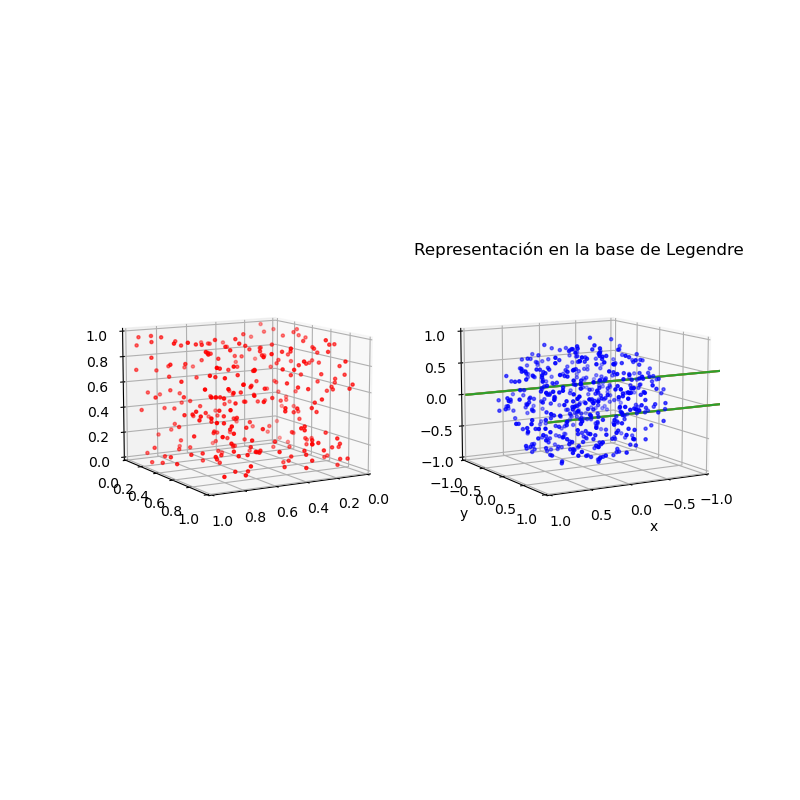

In [202]:
fig = plt.figure(figsize=(8,8))
esfera_1 = fig.add_subplot(1,2,1, projection = '3d')
esfera_2 = fig.add_subplot(1,2,2, projection = '3d')


#configurar límites de los ejes
esfera_1.set_xlim3d(0, 1)
esfera_1.set_ylim3d(0, 1)
esfera_1.set_zlim3d(0, 1)

esfera_2.set_xlim3d(-Radio, Radio)
esfera_2.set_ylim3d(-Radio, Radio)
esfera_2.set_zlim3d(-Radio, Radio)

esfera_1 .view_init(10, 60)
esfera_2.view_init(10, 60)


esfera_1 .scatter(data[:,0], data[:,1], data[:,2], color='r', marker='.')
esfera_2.scatter(data_sphere[0], data_sphere[1], data_sphere[2], color='b', marker='.')

#plt.savefig('3dPoints.pdf')
plt.show()

In [ ]:
#La simetría de rotación de la esfera es muy alta, debido a que cualquier línea que pase por su centro puede ser un eje de rotación. Esto significa que la esfera es simétrica en todas las direcciones y que no tiene una orientación preferida, como podemos observar en la gráfica.

#Además, cualquier rotación de la esfera puede ser descrita por una única coordenada angular, lo que significa que existe una correspondencia uno a uno entre las rotaciones y los ángulos de rotación, lo que la hace simétrica en todas las direcciones. En general esta esfera tendra una simetria de rotación basntante similar a cualquier esfera.